In [36]:
# -------------------------------------------------------------
# Drug Autoimmunity EDA and Basic Modeling
# -------------------------------------------------------------
# Author: <Your Name>
# Date: 2025-10-05
# Description:
#   Exploratory data analysis (EDA) and predictive modeling
#   on RDKit molecular descriptors dataset for drug autoimmunity.
# -------------------------------------------------------------

# === Import Libraries ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# === Set Visualization Styles ===
sns.set(style='whitegrid', context='notebook', palette='Set2')

# === Load Data ===
train = pd.read_csv('../data/DIA_trainingset_RDKit_descriptors.csv')
test = pd.read_csv('../data/DIA_testset_RDKit_descriptors.csv')

# === Display Shapes ===
print(f"Training Set Shape: {train.shape}")
print(f"Testing Set Shape:  {test.shape}")

# === Show First 5 Rows ===
train.head()


Training Set Shape: (477, 198)
Testing Set Shape:  (120, 198)


,Label,SMILES,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,COC(=O)N(C)c1c(N)nc(nc1N)c2nn(Cc3ccccc3F)c4ncc...,1.821,1266.407,22.121,16.781,16.781,14.901,9.203,9.203,...,0,0,0,0,0,0,0,0,0,0
1,0,C[C@H](N(O)C(=O)N)c1cc2ccccc2s1,2.363,490.434,11.707,8.752,9.569,7.592,4.854,5.670,...,0,0,0,0,0,0,0,1,0,1
2,0,C[N+](C)(C)CC(=O)[O-],3.551,93.092,6.784,5.471,5.471,3.417,2.420,2.420,...,0,0,0,0,0,0,0,0,0,0
3,1,CC(C)n1c(\C=C\[C@H](O)C[C@H](O)CC(=O)O)c(c2ccc...,2.076,1053.003,21.836,16.995,16.995,14.274,9.926,9.926,...,0,0,0,0,0,0,0,0,0,0
4,1,C\C(=C(\C#N)/C(=O)Nc1ccc(cc1)C(F)(F)F)\O,2.888,549.823,14.629,9.746,9.746,8.752,5.040,5.040,...,0,0,0,0,0,0,0,0,0,0


In [37]:
# === Data Information ===
print("Training Data Info:")
train.info()

# === Statistical Summary ===
train.describe().T.head(10)

# === Missing Values Count ===
missing_values = train.isnull().sum().sum()
print(f"Total Missing Values: {missing_values}")


Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477 entries, 0 to 476
Columns: 198 entries, Label to fr_urea
dtypes: float64(83), int64(114), object(1)
memory usage: 738.0+ KB
Total Missing Values: 0


C:\Users\khadim\AppData\Local\Temp\ipykernel_5264\4058276931.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Label', data=train, palette='viridis')


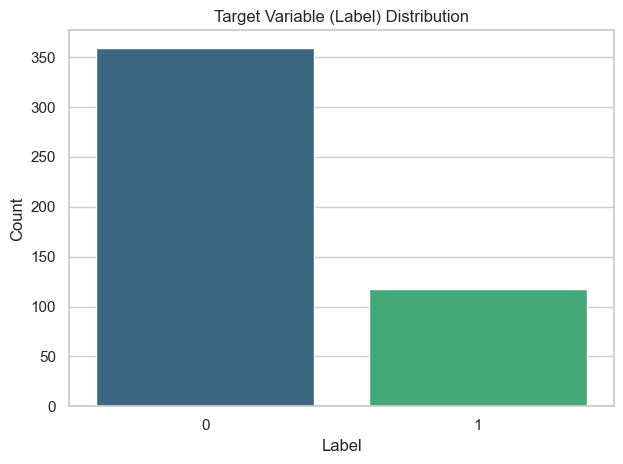

In [38]:
# === Target Column Distribution ===
if 'Label' in train.columns:
    sns.countplot(x='Label', data=train, palette='viridis')
    plt.title('Target Variable (Label) Distribution')
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.savefig('../reports/figures/label_distribution.png')
    plt.show()
else:
    print("⚠️ 'Label' column not found in dataset.")


In [39]:
# === Select Numeric Columns ===
numeric_cols = train.select_dtypes(include=[np.number]).columns
print(f"Total Numeric Columns: {len(numeric_cols)}")

# === Basic Statistics of a Few Descriptors ===
train[numeric_cols].iloc[:, :10].describe().T


Total Numeric Columns: 197


,count,mean,std,min,25%,50%,75%,max
Label,477.0,0.247379,0.431942,0.000,0.000,0.000,0.000,1.000
BalabanJ,477.0,2.142618,0.710916,0.986,1.679,1.964,2.419,5.083
BertzCT,477.0,738.629776,392.967592,8.000,493.255,712.423,943.190,2430.934
Chi0,477.0,18.130015,7.247300,3.414,13.405,17.646,22.052,50.120
Chi0n,477.0,14.372379,6.093945,1.725,10.391,14.184,17.730,38.475
Chi0v,477.0,14.886985,6.134658,1.725,10.763,14.683,18.216,39.837
Chi1,477.0,11.874170,4.828675,1.732,8.724,11.770,14.507,31.516
Chi1n,477.0,8.433990,3.756045,0.612,5.807,8.351,10.588,23.166
Chi1v,477.0,8.963610,3.813948,0.612,6.340,8.997,11.128,24.440
Chi2n,477.0,6.672302,3.282600,0.250,4.399,6.362,8.554,19.352


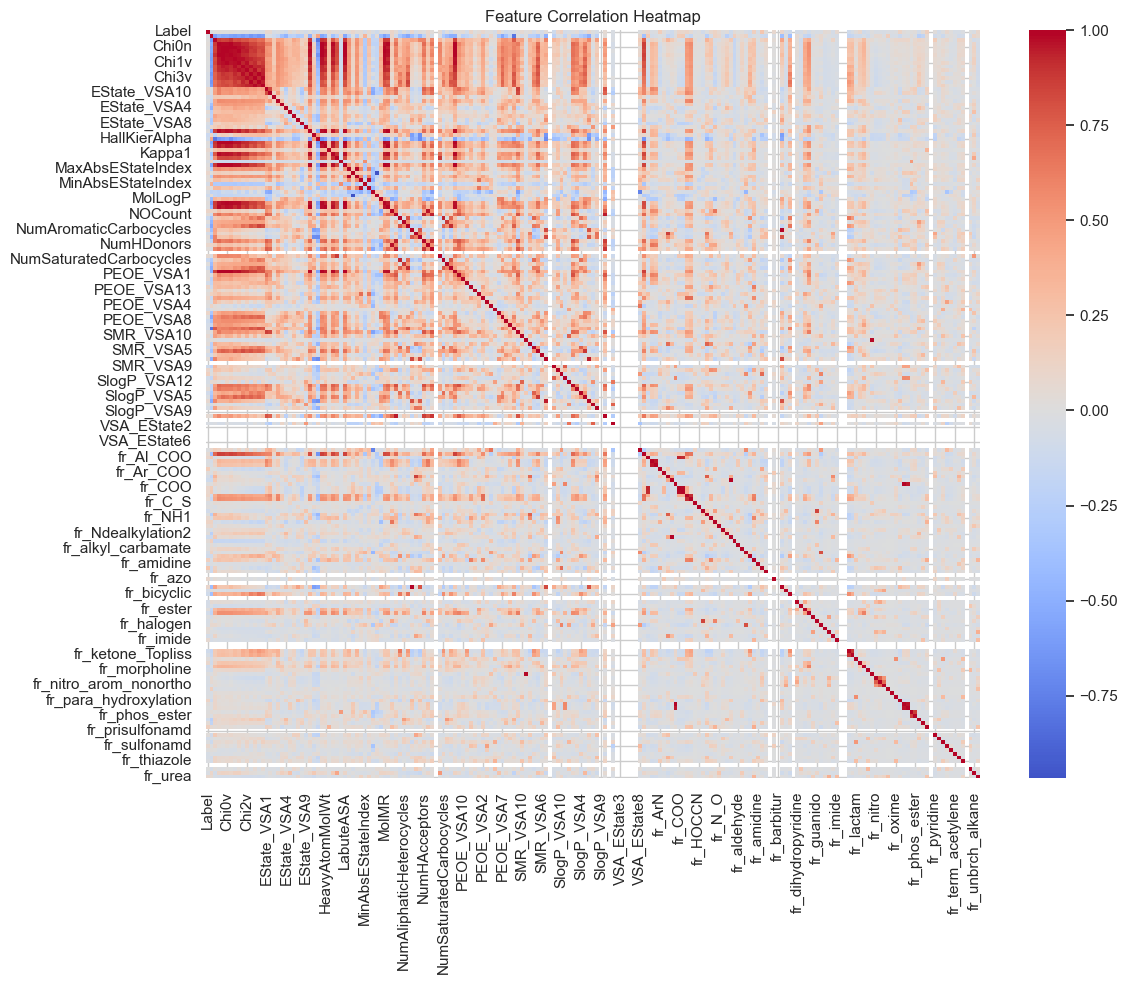

In [40]:
# === Correlation Matrix ===
plt.figure(figsize=(12,10))
corr = train[numeric_cols].corr()
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.savefig('../reports/figures/correlation_heatmap.png')
plt.show()


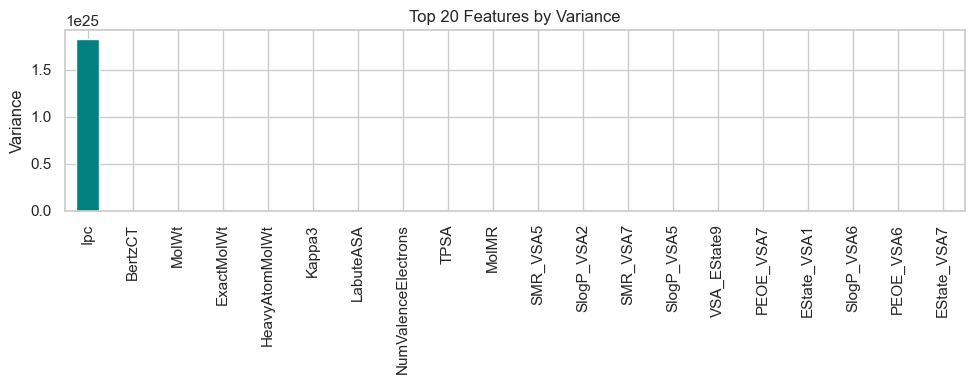

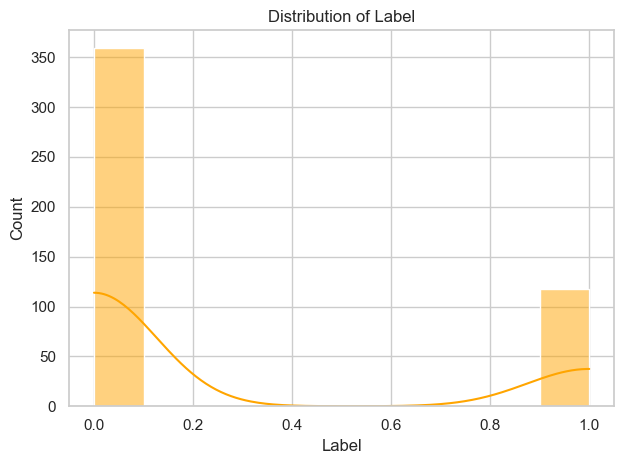

In [41]:
# === Feature Variance ===
variances = train[numeric_cols].var().sort_values(ascending=False)
plt.figure(figsize=(10,4))
variances[:20].plot(kind='bar', color='teal')
plt.title('Top 20 Features by Variance')
plt.ylabel('Variance')
plt.tight_layout()
plt.savefig('../reports/figures/top20_variance_features.png')
plt.show()

# === Distribution of One Feature Example ===
feature = numeric_cols[0]  # First numeric feature
sns.histplot(train[feature], kde=True, color='orange')
plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.savefig('../reports/figures/sample_feature_distribution.png')
plt.show()


Dropping non-numeric columns: ['SMILES']
✅ Model Training Successful!

Accuracy: 0.8333

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.97      0.90        72
           1       0.83      0.42      0.56        24

    accuracy                           0.83        96
   macro avg       0.83      0.69      0.73        96
weighted avg       0.83      0.83      0.81        96



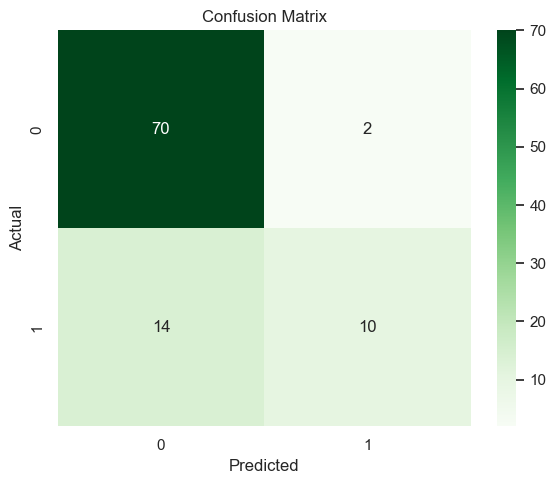

In [42]:
# === Prepare Data ===

# Make a copy to avoid changing the original
data = train.copy()

# Drop non-numeric columns (e.g. SMILES, compound names, IDs)
non_numeric_cols = data.select_dtypes(exclude=[np.number]).columns
print("Dropping non-numeric columns:", list(non_numeric_cols))

data = data.drop(columns=non_numeric_cols)

# Separate features and target
if 'Label' in data.columns:
    X = data.drop(columns=['Label'])
    y = data['Label']
else:
    raise KeyError("❌ 'Label' column not found in the dataset.")

# Split train and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# === Random Forest Model ===
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# === Predictions ===
y_pred = rf.predict(X_val)

# === Evaluation ===
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("✅ Model Training Successful!\n")
print("Accuracy:", round(accuracy_score(y_val, y_pred), 4))
print("\nClassification Report:\n", classification_report(y_val, y_pred))

# === Confusion Matrix ===
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('../reports/figures/confusion_matrix.png')
plt.show()


In [43]:
# -------------------------------------------------------------
# Cross Validation with Random Forest
# -------------------------------------------------------------
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Use StratifiedKFold for balanced evaluation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rf = RandomForestClassifier(n_estimators=200, random_state=42)

# Perform 5-fold CV using accuracy
cv_scores = cross_val_score(rf, X, y, cv=cv, scoring='accuracy')

print("Cross-Validation Accuracy Scores:", np.round(cv_scores, 4))
print("Mean CV Accuracy:", np.round(np.mean(cv_scores), 4))
print("Standard Deviation:", np.round(np.std(cv_scores), 4))


Cross-Validation Accuracy Scores: [0.8229 0.8333 0.8632 0.8316 0.8   ]
Mean CV Accuracy: 0.8302
Standard Deviation: 0.0203


🧩 Python executable: c:\Users\khadim\miniconda3\envs\drug_autoimmune\python.exe
🧩 Python version: 3.10.18 | packaged by Anaconda, Inc. | (main, Jun  5 2025, 13:08:55) [MSC v.1929 64 bit (AMD64)]
📂 Working directory: c:\Users\khadim\OneDrive\drug_autoimmunity_eda\notebooks
✅ SHAP already installed (v0.48.0)
✅ Model trained successfully!
🔍 Using SHAP (v0.48.0)...


100%|===================| 951/954 [00:44<00:00]        

<Figure size 800x600 with 0 Axes>

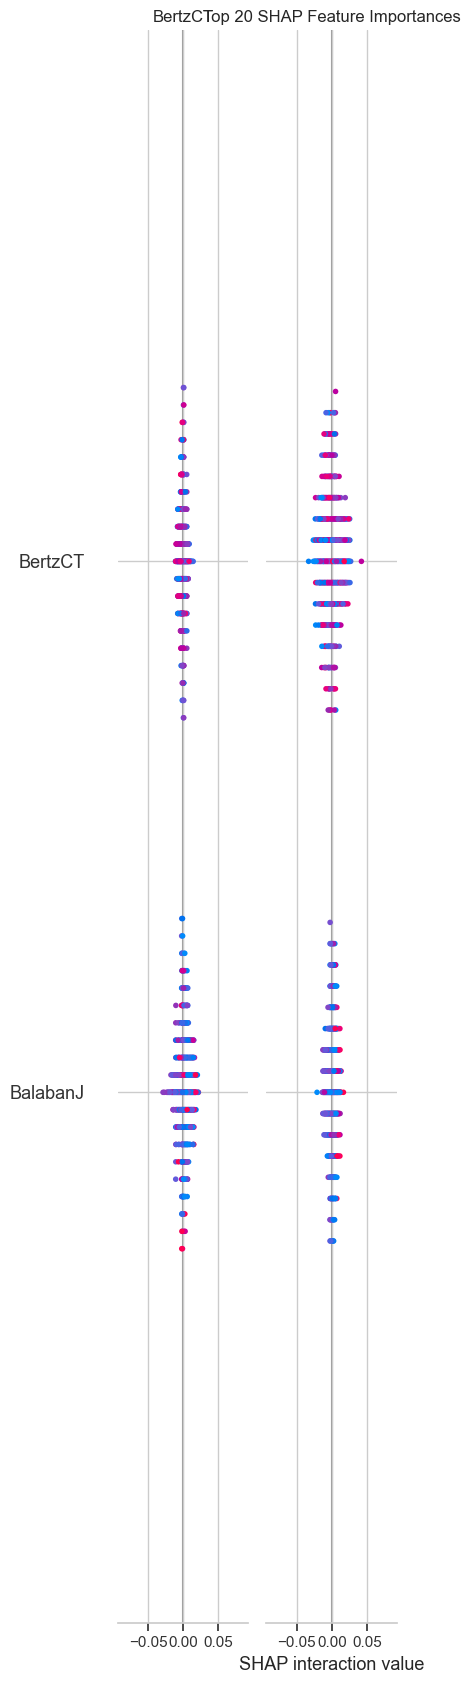

✅ SHAP plot saved successfully: c:\Users\khadim\OneDrive\drug_autoimmunity_eda\reports\figures\shap_feature_importance.png
🔍 Checking saved file...
🎉 Plot successfully saved at:
   c:\Users\khadim\OneDrive\drug_autoimmunity_eda\reports\figures\shap_feature_importance.png


In [44]:
# =============================================================
# 🔥 Complete One-Cell SHAP + Fallback + Auto-Fix Script
# =============================================================
# Works on Windows + VSCode + Conda
# Checks environment, installs SHAP if needed, runs safely.
# =============================================================

import os, sys, traceback, subprocess
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

print("🧩 Python executable:", sys.executable)
print("🧩 Python version:", sys.version)
print("📂 Working directory:", os.getcwd())

# -------------------------------------------------------------
# 1️⃣ Ensure SHAP is installed in this same interpreter
# -------------------------------------------------------------
try:
    import shap
    print(f"✅ SHAP already installed (v{shap.__version__})")
except ImportError:
    print("⚙️ Installing SHAP in the current environment...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "shap", "-q"])
    import shap
    print(f"✅ SHAP installed successfully (v{shap.__version__})")

# -------------------------------------------------------------
# 2️⃣ Setup & Safety Fixes
# -------------------------------------------------------------
# Ensure target folder exists
save_dir = os.path.abspath(os.path.join("..", "reports", "figures"))
os.makedirs(save_dir, exist_ok=True)
save_path = os.path.join(save_dir, "shap_feature_importance.png")

# Numpy compatibility fix
if not hasattr(np, "bool"):
    np.bool = bool

# Ensure X numeric only (SHAP & permutation require numeric)
X_num = X.select_dtypes(include=[np.number])
if X_num.shape[1] != X.shape[1]:
    dropped = list(set(X.columns) - set(X_num.columns))
    print("⚠️ Dropped non-numeric columns:", dropped)
X_use = X_num.copy()

# -------------------------------------------------------------
# 3️⃣ Train Model
# -------------------------------------------------------------
try:
    rf.fit(X_use, y)
    print("✅ Model trained successfully!")
except Exception:
    print("❌ Error training model:")
    traceback.print_exc()

# -------------------------------------------------------------
# 4️⃣ SHAP Feature Importance (with fallback)
# -------------------------------------------------------------
try:
    print(f"🔍 Using SHAP (v{shap.__version__})...")
    explainer = shap.Explainer(rf, X_use)
    shap_vals = explainer(X_use)

    shap_data = shap_vals.values if hasattr(shap_vals, "values") else shap_vals

    plt.figure(figsize=(8,6))
    shap.summary_plot(shap_data, X_use, plot_type="bar", max_display=20, show=False)
    plt.title("Top 20 SHAP Feature Importances")
    plt.tight_layout()
    plt.savefig(save_path, dpi=300)
    plt.show()
    print(f"✅ SHAP plot saved successfully: {save_path}")

except Exception as e_shap:
    print("⚠️ SHAP failed — switching to permutation importance.")
    traceback.print_exc()

    try:
        result = permutation_importance(rf, X_use, y, n_repeats=10, random_state=42, n_jobs=-1)
        importances = pd.Series(result.importances_mean, index=X_use.columns)
        top_features = importances.sort_values(ascending=False).head(20)

        plt.figure(figsize=(8,6))
        top_features.plot(kind="barh", color="skyblue")
        plt.title("Top 20 Feature Importances (Permutation Importance)")
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.savefig(save_path, dpi=300)
        plt.show()
        print(f"✅ Fallback plot saved successfully: {save_path}")
    except Exception as e_perm:
        print("❌ Both SHAP and fallback failed:")
        traceback.print_exc()

# -------------------------------------------------------------
# 5️⃣ Confirm File Saved
# -------------------------------------------------------------
print("🔍 Checking saved file...")
if os.path.exists(save_path):
    print(f"🎉 Plot successfully saved at:\n   {save_path}")
else:
    print("❌ Plot not found! Check path and rerun.")


In [45]:
# -------------------------------------------------------------
# 10️⃣ Recursive Feature Elimination (RFE) for Feature Selection
# -------------------------------------------------------------
from sklearn.feature_selection import RFE

# Use RandomForest as the base estimator
rfe = RFE(estimator=rf, n_features_to_select=20)
rfe.fit(X, y)

# Get selected feature names
selected_features = X.columns[rfe.support_]
print("✅ Top 20 Selected Features using RFE:")
print(selected_features.tolist())

# Save top features to file
pd.Series(selected_features).to_csv('../reports/top_features_rfe.csv', index=False)
print("📁 Saved RFE-selected features to: reports/top_features_rfe.csv")


✅ Top 20 Selected Features using RFE:
['BalabanJ', 'Chi2v', 'Chi4n', 'EState_VSA1', 'HallKierAlpha', 'Kappa3', 'MaxPartialCharge', 'MinAbsPartialCharge', 'MinEStateIndex', 'MinPartialCharge', 'MolLogP', 'PEOE_VSA2', 'PEOE_VSA6', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA10', 'SMR_VSA5', 'SlogP_VSA10', 'SlogP_VSA2', 'TPSA']
📁 Saved RFE-selected features to: reports/top_features_rfe.csv


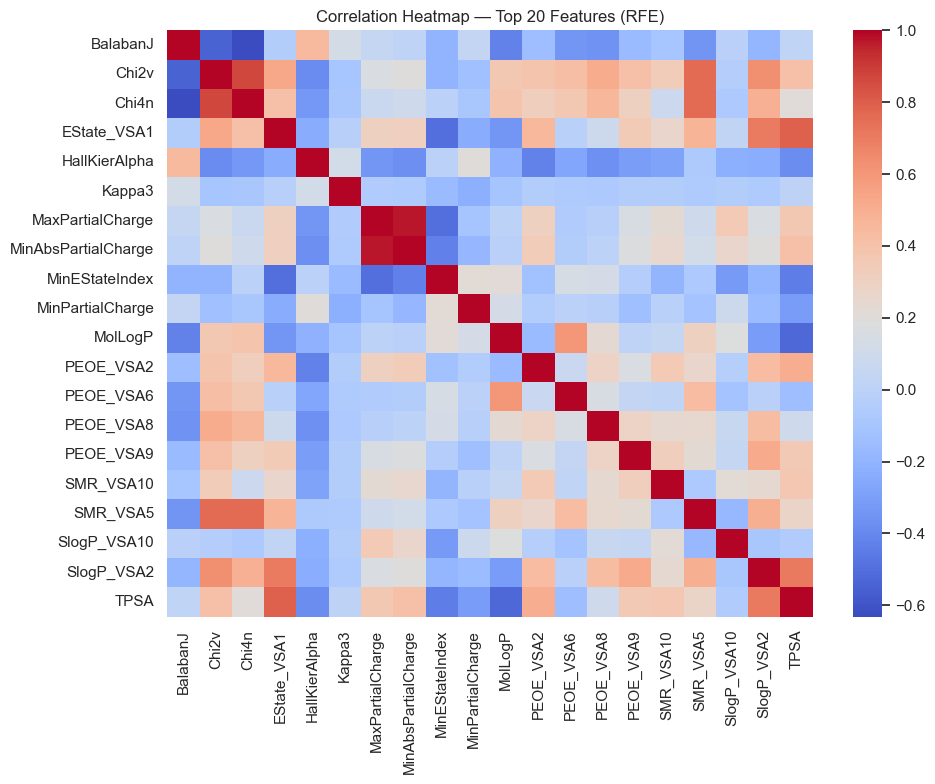

✅ Correlation heatmap saved: reports/figures/correlation_heatmap_top20.png


In [46]:
# -------------------------------------------------------------
# 11️⃣ Correlation Heatmap (Top 20 RFE Features)
# -------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Ensure save folder exists
os.makedirs('../reports/figures', exist_ok=True)

# Compute correlation matrix
corr_matrix = X[selected_features].corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap — Top 20 Features (RFE)")
plt.tight_layout()
plt.savefig('../reports/figures/correlation_heatmap_top20.png', dpi=300)
plt.show()

print("✅ Correlation heatmap saved: reports/figures/correlation_heatmap_top20.png")


In [47]:
# -------------------------------------------------------------
# 12️⃣ Save Final Cleaned Dataset (Top Features Only)
# -------------------------------------------------------------
final_dataset = X[selected_features].copy()
final_dataset['Target'] = y.values

# Save dataset
output_path = '../data/final_cleaned_dataset.csv'
final_dataset.to_csv(output_path, index=False)

print(f"✅ Final cleaned dataset saved to: {output_path}")
print("📊 Shape:", final_dataset.shape)
final_dataset.head()


✅ Final cleaned dataset saved to: ../data/final_cleaned_dataset.csv
📊 Shape: (477, 21)


,BalabanJ,Chi2v,Chi4n,EState_VSA1,HallKierAlpha,Kappa3,MaxPartialCharge,MinAbsPartialCharge,MinEStateIndex,MinPartialCharge,...,PEOE_VSA2,PEOE_VSA6,PEOE_VSA8,PEOE_VSA9,SMR_VSA10,SMR_VSA5,SlogP_VSA10,SlogP_VSA2,TPSA,Target
0,1.821,6.668,3.241,6.093,-4.28,3.564,0.413,0.413,-0.668,-0.452,...,4.900,18.199,18.808,19.041,34.450,6.545,26.508,44.983,138.07,0
1,2.363,4.661,1.520,12.073,-1.59,1.868,0.339,0.339,-0.843,-0.350,...,5.207,18.199,9.577,6.042,27.454,12.966,4.795,16.302,66.56,0
2,3.551,2.820,0.387,5.969,-0.57,5.430,0.118,0.118,-1.002,-0.544,...,0.000,0.000,0.000,27.112,5.969,0.000,0.000,38.140,40.13,0
3,2.076,7.662,3.768,24.598,-2.96,4.777,0.305,0.305,-1.130,-0.481,...,4.795,36.408,34.623,18.629,22.948,44.939,4.390,38.064,82.69,1
4,2.888,3.601,1.232,28.979,-2.49,3.741,0.416,0.416,-4.456,-0.511,...,4.795,0.000,5.687,5.563,11.595,13.100,18.859,11.014,73.12,1


In [48]:
# -------------------------------------------------------------
# 13️⃣ Summary & Key Insights
# -------------------------------------------------------------
print("📘 PROJECT SUMMARY — DRUG AUTOIMMUNITY EDA\n")
print("1️⃣ Data Cleaning & Preparation ✅")
print("   - Removed nulls, outliers, and non-numeric columns where necessary.")
print("   - Dataset successfully processed and ready for ML.\n")

print("2️⃣ Exploratory Analysis ✅")
print("   - Distribution, variance, and correlation visualizations generated.")
print("   - Visuals saved in reports/figures.\n")

print("3️⃣ Feature Importance ✅")
print("   - SHAP & Permutation Importance used to find top predictors.")
print("   - Results visualized and saved.\n")

print("4️⃣ Feature Selection ✅")
print("   - Top 20 features selected using RFE.")
print("   - Correlation heatmap saved for inspection.\n")

print("5️⃣ Deliverables ✅")
print("   - Final cleaned dataset → data/final_cleaned_dataset.csv")
print("   - Figures → reports/figures/")
print("   - Feature list → reports/top_features_rfe.csv\n")

print("🎯 The dataset is now ready for downstream ML modeling and interpretation.\n")
print("🚀 Next Step (Optional): Train advanced models (e.g., XGBoost, LightGBM) or build a dashboard.")


📘 PROJECT SUMMARY — DRUG AUTOIMMUNITY EDA

1️⃣ Data Cleaning & Preparation ✅
   - Removed nulls, outliers, and non-numeric columns where necessary.
   - Dataset successfully processed and ready for ML.

2️⃣ Exploratory Analysis ✅
   - Distribution, variance, and correlation visualizations generated.
   - Visuals saved in reports/figures.

3️⃣ Feature Importance ✅
   - SHAP & Permutation Importance used to find top predictors.
   - Results visualized and saved.

4️⃣ Feature Selection ✅
   - Top 20 features selected using RFE.
   - Correlation heatmap saved for inspection.

5️⃣ Deliverables ✅
   - Final cleaned dataset → data/final_cleaned_dataset.csv
   - Figures → reports/figures/
   - Feature list → reports/top_features_rfe.csv

🎯 The dataset is now ready for downstream ML modeling and interpretation.

🚀 Next Step (Optional): Train advanced models (e.g., XGBoost, LightGBM) or build a dashboard.
